# Lecture 1 - Python for Numerical Methods: the (very basic) essentials

## Motivation: Why Python?

Today we will have a crash course on the main functionalities needed to build numerical methods in Python. The reality is that it takes a considerable amount of time to be fully proficient in programming in general. We learn new things every day. I do, after roughly 13 years of coding, and I believe that it will never end :)

That does not mean that we can't develop a fundamental set of programming skills that enables us to have our numerical methods and ML course. You will see that Python is a great programming language due to its simple syntax; Yet, it has a great community: Most of the popular Python tools and packages are built by the scientific community, for the scientific community. 

Python is also free and open-source. This means that you can (i) use it without paying anything, which is great for, among other things, preparing you to be a competitive chemical engineer in the market and (ii) you can actually see what is going on inside the source codes made available by the community.

Python has been steadily becoming the main tool for data science, numerical methods and machine learning. When I took this course 13 years ago, things were a lot different. Python was still becoming popular, and close-source, commercial programming languages were still dominant in chemical engineering. This created a barrier between us (ChemEs) and the other scientific communities (computer science, machine learning, etc). Now, we can see these communities way more integrated and collaborating. And I personally think that this is due to the emergence of tools like Python.

Companies like google, Microsoft and Meta, and foundations like Linux Foundation all use Python to build their software, ranging from machine learning ecosystems like [PyTorch](https://pytorch.org), [TensorFlow](https://www.tensorflow.org) and [JAX](https://docs.jax.dev/en/latest/index.html) -- Allowing the training of massive-scale ML models, to frameworks that enable material discovery [Open Catalyst Project](https://opencatalystproject.org). All of these applications certainly use numerical methods, ML, and most likely, both. 



[A recent Survey by Stack Overflow](https://survey.stackoverflow.co/2024/technology#most-popular-technologies-language) shows Python among the top languages **overall* for "professional developers", "learning how to code", and "other coders" (maybe that's us?) categories:

![](../images/survey_stack_overflow_01.png)





![](../images/survey_stack_overflow_02.png)

![](../images/survey_stack_overflow_03.png)

![](../images/survey_stack_overflow_04.png)

I hope this small discussion with some examples and data is sufficient to motivate you. :) To the learning outcomes!

## Learning Outcomes

-  Understand the basic Python variables types and operations
-  Printing 
-  Understanding the concept of control flows
-  Getting used to basic NumPy syntax/use
-  Use `?` to get help about a certain Python function
-  Becoming familiar with basic plotting (using matplotlib)
-  Understanding the motivation of numerical methods.

## 1) Basic Operations

### 1.1. Defining variables
Defining variables is one of the most simplest yet important operations we will do. Use `=` to assign. Variable names start with a letter or `_` and can include numbers/underscores.

We will follow a ChemE theme when possible (variables we are used to work with such as pressures, temperatures, flows, etc.).

In [1]:
# Basic variables
T = 350                 # temperature in K (integer)
P = 1.2                 # pressure in bar (float)
component = "MEK"       # this is a string
flows = [2.0, 3.5, 1.2] # list of three stream flows (e.g., mol/min)

We need to use the `print()` command to print these variables.

We can print the variables themselves. For example:

In [2]:
print("The temperature is" + " " + str(T) + " " +"Kelvin")

The temperature is 350 Kelvin


Or their types, using the `type` command (native in Python)

In [3]:
# Show types
print(type(T))
print(type(P))
print(type(component))
print(type(flows))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'list'>


You can also 'pick' elements of a list

In [4]:
flows[0]

2.0

Or slices

In [5]:
flows[0:2]

[2.0, 3.5]

Note that indexing starts at zero and the slice is upper-bound exclusive.

In [6]:
flows[-1] # gets the last element of the list

1.2

### 1.2 Printing and f-strings
Use **f-strings** to embed variables in text and format results.

In [7]:
# Basic printing
print("Temperature:", T, "K")

# f-string with units and formatting
R = 8.3145e-3  # kJ/mol/K
print(f"T = {T} K, P = {P:.2f} bar, R = {R:.4f} kJ/mol/K")

# Show list contents
print(f"Flows (mol/min): {flows}")

Temperature: 350 K
T = 350 K, P = 1.20 bar, R = 0.0083 kJ/mol/K
Flows (mol/min): [2.0, 3.5, 1.2]


### 1.3 Simple arithmetic and operator precedence
Use parentheses liberally for readability. Scientific notation like `1e-3` is fine for magnitudes.

Try:
- Convert 1.2 bar to kPa. (1 bar $=$ 100 kPa)


In [8]:
# Examples
kPa_per_bar = 100.0
P_kPa = P * kPa_per_bar
print(f"{P:.2f} bar = {P_kPa:.1f} kPa")

# Scientific notation
tiny = 2.3e-5
print("tiny =", tiny)

# Order of operations demo
expression_1 = 2**3 * 3 + 4        # 8*3 + 4 = 28
expression_2 = 2**3 * (3 + 4)      # 8*(7) = 56
print(expression_1, expression_2)

1.20 bar = 120.0 kPa
tiny = 2.3e-05
28 56


## 2) Conditionals and loops

### 2.1 `if` / `elif` / `else`
Use conditionals to branch logic. For example, assume you are in a plant and are asked to print in the computer screen if the pressure is low, moderate and high depending on intervals:

In [9]:
P = 0.9
print(P)

0.9


In [10]:
# Example: categorize pressure
if P < 1:
    label = "low"
elif 1 <= P < 5:
    label = "moderate"
else:
    label = "high"
print(f"P={P:.2f} bar is {label}.")

P=0.90 bar is low.


### 2.2 `for` loops and ranges
Use `range(N)` for integer loops; iterate over lists directly for data.

In [11]:
# Summing flows with a for-loop
total_flow = 0.0
for f in flows:
    total_flow +=  f
print(f"Total flow = {total_flow:.2f} mol/min")

# Using range
for i in range(len(flows)):
    print(f"Stream {i+1}: {flows[i]} mol/min")

Total flow = 6.70 mol/min
Stream 1: 2.0 mol/min
Stream 2: 3.5 mol/min
Stream 3: 1.2 mol/min


### 2.2 `while`

In [12]:
number = 1

while number < 10:          
    print("Current number is", number)
    number = number + 1

print("Final total:", number)

Current number is 1
Current number is 2
Current number is 3
Current number is 4
Current number is 5
Current number is 6
Current number is 7
Current number is 8
Current number is 9
Final total: 10


## 3) NumPy arrays (vectorized computing)
Most scientific math is performed using arrays in **NumPy**. Arrays enable **vectorized** operations (fast and concise). It is a standard way to deal with vectors and matrices while coding, which are mathematical entities that frequently appear in science and engineering; Chemical engineering is no different.

**NumPy** is a *Python package*. This means that someone (in NumPy's case, a whole team over several years and currently being actively developed) has put together several functions and algorithms that facilitate the use of certain algorithms. 


For example:

1. Evaluating an inverse of a matrix or,

2. Solving a linear system $Ax=b$ (more on that later today)

3. To evaluate recurring functions ($e^x$, `numpy.exp`, $sin(x)$, `numpy.sin`,...)

In order to use `numpy`, you have to import it. It can be imported as 

In [13]:
import numpy as np

Note that we imported numpy as `np`. This is handy because is an abbreviation/alias of the package name and makes your code shorter. It's a common Python programming practice, seeking conciseness. You don't have to do this. Most people do it, though.

#### A note on local vs cloud (google colab) Python environments.

Since we are using Google Colab, its Python installed already comes with necessary *Python packages* we need preinstalled (`numpy`, `scipy`, `matploblib` and `scikit-learn`)

This is not true when you have a local Python installation in your own computer. You would need to install Python and then, the packages you need/want to. One way to achieve this easily is by using the Anaconda distribution, available here:
https://www.anaconda.com/download

Ps.: You can hit the 'skip registration' button and download Anaconda without registering. It's free.

### Back to Numpy :)

Ok, back to NumPy. We imported it and we can take advantage of NumPy's extensive library of function/functionalities. For example, we can create an array:

In [14]:
x = np.array([0.0, 0.5, 1.0])

print("x  =", x)

x  = [0.  0.5 1. ]


and use some neat functionalitiy from numpy to inspect this array:

In [15]:
x.shape

(3,)

We can also do element-wise operations, such as calculating $y=x^2 + 2x + 1$ for each element of the $x$ vector we just defined:

In [16]:
y = x**2 + 2*x + 1     # element-wise operation

print("y  =", y)

y  = [1.   2.25 4.  ]


You can also create evenly-spaced vectors easily by using numpy's linspace function, for example:

In [17]:
# linspace to generate grids
t = np.linspace(0, 10, 5)
print("t  =", t)

t  = [ 0.   2.5  5.   7.5 10. ]


What do you think that linspace just did?

#### Taking an inverse?

Let's try to take an inverse of the vector $x$

In [18]:
import numpy as np

I'm being repetitive here, but on purpose. You don't have to import the package twice.


Now, one of the most important things of coding: Reading documentation. You can find online NumPy's extensive documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

you can also use a question mark `?` before a specific function name to bring up the documentation of this function as an output

And we can see that the function/algorithm that calculates the inverse of a matrix is within the NumPy's subpackage `linalg` (stands for linear algebra, which makes sense).

We need to use `np.linalg(x)` to evaluate the inverse of $x$

In [19]:
?np.linalg.inv

Signature:       np.linalg.inv(a)
Call signature:  np.linalg.inv(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function inv at 0x1105af740>
File:            /opt/anaconda3/envs/numerical/lib/python3.13/site-packages/numpy/linalg/_linalg.py
Docstring:      
Compute the inverse of a matrix.

Given a square matrix `a`, return the matrix `ainv` satisfying
``a @ ainv = ainv @ a = eye(a.shape[0])``.

Parameters
----------
a : (..., M, M) array_like
    Matrix to be inverted.

Returns
-------
ainv : (..., M, M) ndarray or matrix
    Inverse of the matrix `a`.

Raises
------
LinAlgError
    If `a` is not square or inversion fails.

See Also
--------
scipy.linalg.inv : Similar function in SciPy.
numpy.linalg.cond : Compute the condition number of a matrix.
numpy.linalg.svd : Compute the singular value decomposition of a matrix.

Notes
-----
Broadcasting rules apply, see the `numpy.linalg` documentation for
details.

If `a` is detected to be singular, a `LinAlgErro

In [20]:
np.linalg.inv(x)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

Whoa. What is this error? Well, if you read what we call a Traceback, you will see that it is pretty clear what happened:

"LinAlgError: 1-dimensional array given. Array must be at least two-dimensional"

Which is true. If we print x we can see it is a vector, not a matrix.

In [21]:
print(x)
print(x.shape)

[0.  0.5 1. ]
(3,)


More especifically, it is the vector

$x = \begin{bmatrix} 0 \\ 0.5 \\ 1 \end{bmatrix}$

Important note: Being able to read errors/bugs is also very important. It helps you to understand what is going wrong with your algorithm/code. It can be a misuse of the function from an external package (the case here) or a bug. :)

Ok, intentional mistake. But does this function actually work? Let's try an actual (square) matrix.

$$
A = \begin{bmatrix} 4 & 7 \\ 2 & 6 \end{bmatrix}
$$

Let's first check if the determinant is nonzero (inverse existence condition)

$$
\det(A) = (4)(6) - (7)(2) = 24 - 14 = 10
$$

It does. Let's apply the inverse matrix formula:

For a 2×2 matrix
$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix},
$$
the inverse is given by:

$$
A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

Applying this to our matrix:

$$
A^{-1} = \frac{1}{10} \begin{bmatrix} 6 & -7 \\ -2 & 4 \end{bmatrix}
= \begin{bmatrix} 0.6 & -0.7 \\ -0.2 & 0.4 \end{bmatrix}
$$


And check if this actually true. Remember that $AA^{-1} = I$ the identity matrix.

$$
\begin{bmatrix}
4 & 7 \\
2 & 6
\end{bmatrix}
\cdot
\begin{bmatrix}
0.6 & -0.7 \\
-0.2 & 0.4
\end{bmatrix}
=
\begin{bmatrix}
(4)(0.6) + (7)(-0.2) & (4)(-0.7) + (7)(0.4) \\
(2)(0.6) + (6)(-0.2) & (2)(-0.7) + (6)(0.4)
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

Well, that was a bit long. What about using NumPy? Let's create an array A, evaluate its inverse, and check if it actually did the right thing.

In [22]:
A = np.array([[4, 7],
             [2, 6]])

print(A)

print('The dimensions of A are ' + str(A.shape))

[[4 7]
 [2 6]]
The dimensions of A are (2, 2)


now, let's check using `np.linalg.inv`:

In [23]:
A_inv = np.linalg.inv(A)

print(A_inv)

[[ 0.6 -0.7]
 [-0.2  0.4]]


You can access elements of any array using slices, similar to what we did with lists:

In [24]:
print(A_inv[0])    # Gives the first row
print(A_inv[0,0])  # Gives element in first row, first column = 0.6
print(A_inv[0,-1]) # Gives first row, last element of the column
print(A_inv[0,-2]) # Gives first row, first element of the column too!

[ 0.6 -0.7]
0.6
-0.7000000000000001
0.6


Nevertheless, this inverse matches with the analytical answer. Double checking, we have to get the identity matrix if we do $A^{-1}A$. In order to do matrix multiplication, we use the `@` operator in Python (since Python 3.5)

In [25]:
I =  A @ A_inv

print(I)

[[ 1.00000000e+00 -1.11022302e-16]
 [-1.11022302e-16  1.00000000e+00]]


Which is pretty much the identity matrix. You can see some numerical differences here (1.1e-16) due to numerics. Remember: Most of the operations in a computer are within a certain *tolerance* and we are pretty safe to say that this number on position $i_{1,2}$ is zero:

$0.0000000000000000111022302\approx 0$

### Common functions

Trigonometric functions: 

In [26]:
import numpy as np
from numpy import pi

x = pi

sin_of_x = np.sin(x)
print(' sin(x) = ' + str(sin_of_x) )
print(' sin(x) = ' + f'{sin_of_x:.1f}')

 sin(x) = 1.2246467991473532e-16
 sin(x) = 0.0


In [27]:
print(np.cos(x))
print(np.tan(x))
print(np.cosh(x))
print(np.tanh(x))
print((np.sinh(x)/np.cosh(x)))

-1.0
-1.2246467991473532e-16
11.591953275521519
0.9962720762207499
0.99627207622075


Exponential: example : $e^0 = 1$ 

In [28]:
x = 0
print(np.exp(x))

1.0


## 3.1. Example: Mass balances in separation system

Adapted from an example available in [Numerical Methods for Chemical Engineering: Applications in MATLAB](https://doi.org/10.1017/CBO9780511812194), which you have access via CMU libraries, and also online [here (MIT).](https://web.mit.edu/10.34/www/F2002_10x34_HW1_soln.pdf)


![](../images/mass_balance.png)


Given the schematic above, which is a separation system, we are given the inlet flow rate $[kg/h]$ as well as mass fractions of each species involved in the separation in the inlet (stream 1) and outlets (streams 2, 4 and 5).

Let's use here the following notation:

1. $^i F$ is the mass flow of stream $i$
2. $^i w_j$ is the mass fraction of species $j$ in the $ith$ stream.

Hence we can define the unknowns $x_1$, $x_2$ and $x_3$: $x_1={ }^2 F \quad x_2={ }^4 F \quad x_3={ }^5 F$ and define mass balances for the overall system:

${ }^2 F+{ }^4 F+{ }^5 F={ }^1 F$

and for species 1 and 2: 

$\left({ }^2 w_1\right)\left({ }^2 F\right)+\left({ }^4 w_1\right)\left({ }^4 F\right)+\left({ }^5 w_1\right)\left({ }^5 F\right)=\left({ }^1 w_1\right)\left({ }^1 F\right)$

$\left({ }^2 w_2\right)\left({ }^2 F\right)+\left({ }^4 w_2\right)\left({ }^4 F\right)+\left({ }^5 w_2\right)\left({ }^5 F\right)=\left({ }^1 w_2\right)\left({ }^1 F\right)$

This yields a set of three equations with three unknowns. A system that can be solved (e.g., has a unique solution):

$$
\begin{gathered}
x_1+x_2+x_3=10 \\
(0.04) x_1+(0.54) x_2+(0.26) x_3=2 \\
(0.93) x_1+(0.24) x_2+(0.0) x_3=6
\end{gathered}
$$

This can be cast in matrix form $Ax=b$. Using numpy arrays:

In [29]:
A = np.array([[1,    1,    1],
              [0.04, 0.54, 0.26],
              [0.93, 0.24, 0]])

b = np.array([10, 2, 6])

x = np.linalg.solve(A,b)

print('the values of x1, x2 and x3 are: ' + str(x))

the values of x1, x2 and x3 are: [5.82375479 2.43295019 1.74329502]


### 3.1. What can go wrong in linear algebra? [from Prof. Kitchin's intro to python computations in science and engineering](https://pointbreezepubs.gumroad.com/l/pycse-intro)

When solving $Ax=b$, A must be a square array. That is, with as many rows or columns as there are unknowns in your system. Additionally, if you have too few, or too many equations, your system might not have a solution at all, or an infinite number of solutions. For example:

In [30]:
import numpy as np

A = np.array([[1,1],
              [1,1]])

b = np.array([1, 2])


np.linalg.solve(A,b)

LinAlgError: Singular matrix

This happens because the left hand side of the linear system is not linearly dependent and the matrix is, therefore, singular:

$$
\begin{aligned}
& x+y=1 \\
& \text { and } \\
& x+y=2
\end{aligned}
$$

This has no solution. It would be the same case if we had a linear dependent row, such as:


$$
\begin{aligned}
& x+y=1 \\
& \text { and } \\
& 2x+2y=4
\end{aligned}
$$

## 4) Plotting with Matplotlib
We can use the package `matplotlib` to generate **plots** of arrays. Additionally, we can label axes, add legends and grids for better readability.
The simple plot below is just one of the many examples and possibilities of plots available in `matplotlib`. Scatter plots, histograms, 3D plots and so on... The list of capabilities to illustrate data is long. Please take a look at https://matplotlib.org

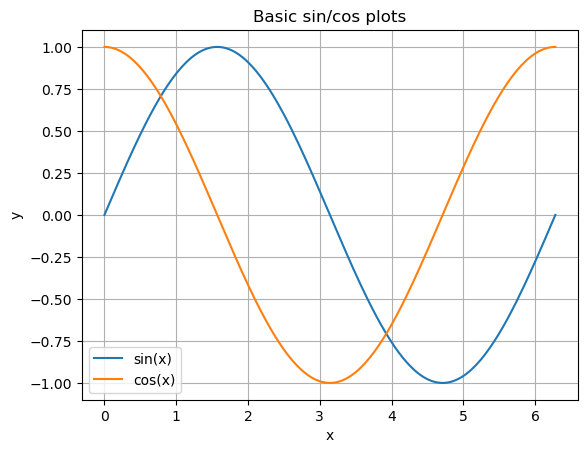

In [31]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label="sin(x)")
plt.plot(x, y2, label="cos(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Basic sin/cos plots")
plt.show()

## 5) Functions in Python



A **function** is a reusable block of code. This is how it usually looks like:
```python
def name(pos1, pos2, kw1=default, kw2=default):
    """Docstring explaining the function's purpose, units, and what it returns."""
    return something
```



### 5.2. Lambda Functions

[Lambda functions can be helpful. They are never necessary. You can always define a function using def, but for some small, single-use functions, a lambda function could make sense. Lambda functions have some limitations, including that they are limited to a single expression, and they lack documentation strings.](https://kitchingroup.cheme.cmu.edu/blog/2013/05/20/Lambda-Lambda-Lambda/)

In [32]:
# Define the Arrhenius equation as a lambda
arrhenius = lambda A, Ea, R, T: A * np.exp(-Ea / (R * T))

# Example parameters
A = 1e7          # pre-exponential factor, 1/s
Ea = 80000       # activation energy, J/mol
R = 8.314        # gas constant, J/mol-K
T = 350          # temperature, K

# Evaluate
k = arrhenius(A, Ea, R, T)
print("Rate constant k =", k, "1/s")

Rate constant k = 1.1487419956649154e-05 1/s


### 5.1. Example - Equation of State (EOS)

Let's define the [**van der Waals EOS**](https://en.wikipedia.org/wiki/Van_der_Waals_equation) as a function and use it to compute **isotherms**.
The equation is
$
P = \frac{RT}{V_m - b} - \frac{a}{V_m^2},
$
with $(a,b)$ specific to each gas, $R$ the gas constant, $T$ temperature, $V_m$ molar volume.

In [33]:
# Units: R in L·atm/(mol·K); Vm in L/mol; T in K; P in atm
# data for a and b for several components can be easily found in: https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)
def vdW_pressure(T, Vm, a=3.6, b=0.0427, R=0.082):
    """
    Compute van der Waals pressure P [atm] for given T [K] and Vm [L/mol].
    Defaults (a=3.6, b=0.0427) correspond to CO2.
    Parameters
    ----------
    T : float or array-like
        Temperature [K]
    Vm : float or array-like
        Molar volume [L/mol]
    a, b : float
        van der Waals parameters (fluid-specific)
    R : float
        Gas constant in L·atm/(mol·K)
    Returns
    --------
    Gas pressure in [atm]
    """

    P = (R * T) / (Vm - b) - a / (Vm**2)
    return P

#### Positional and keyword arguments
- **Positional**: order matters.
- **Keyword**: specify parameter names; order doesn’t matter; great for readability.


In [34]:
# Positional arguments only
p1 = vdW_pressure(300, 0.1)  # T=300 K, Vm=0.1 L/mol (defaults a,b,R for CO2)

# Mix positional + keyword
p2 = vdW_pressure(350, 0.1, a=4.0)  # override 'a', keep b and R defaults

# All keyword arguments
p3 = vdW_pressure(T=400, Vm=0.2, b=0.05, a=4.2, R=0.082)

print(p1, p2, p3)

69.31937172774872 100.87260034904023 113.66666666666667


Let's plot the isotherms:

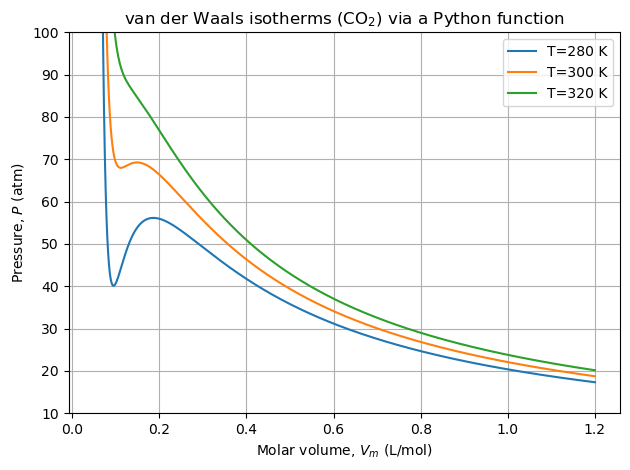

In [35]:
import numpy as np
import matplotlib.pyplot as plt

Vm = np.linspace(0.05, 1.2, 600)  # avoid division by zero at Vm=b


for T_plot in [280, 300, 320]:
    P_curve = vdW_pressure(T_plot, Vm)  # positional for T, Vm
    plt.plot(Vm, P_curve, label=f"T={T_plot} K")


plt.ylim(10, 100)
plt.xlabel("Molar volume, $V_m$ (L/mol)")
plt.ylabel("Pressure, $P$ (atm)")
plt.title("van der Waals isotherms (CO$_2$) via a Python function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.2. Batch Reactor with First-Order Decay
Consider an isothermal batch reactor with a first-order reaction:


$A \; \rightarrow \; Products$


The governing ODE is:


$\frac{dC_A}{dt} = -k C_A$

This ODE is separable and has an analytical solution:


$C_A(t) = C_{A0} e^{-kt}$

This shows **exponential decay** of concentration over time, typical for first-order reactions.

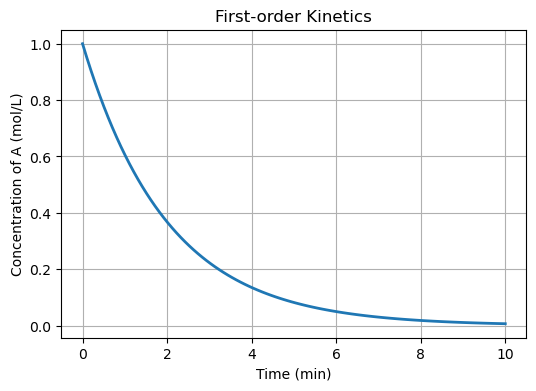

In [36]:
import numpy as np
import matplotlib.pyplot as plt

C0 = 1.0   # mol/L
k = 0.5    # 1/min
t = np.linspace(0, 10, 100)
C = C0 * np.exp(-k * t)

plt.figure(figsize=(6,4))
plt.plot(t, C, lw=2)
plt.xlabel('Time (min)')
plt.ylabel('Concentration of A (mol/L)')
plt.title('First-order Kinetics')
plt.grid(True)
plt.show()

At multiple initial conditions:

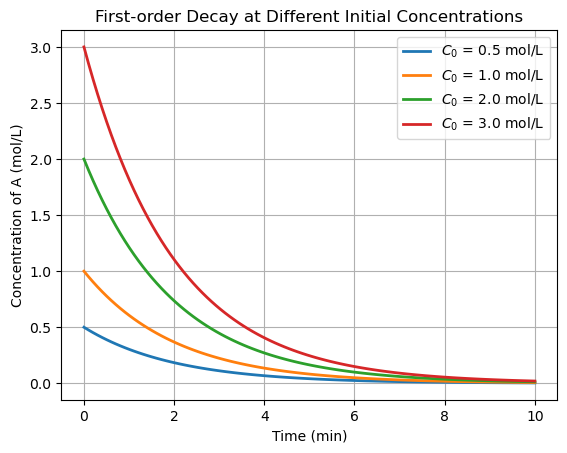

In [37]:
# Parameters
k = 0.5    # 1/min
t = np.linspace(0, 10, 100)

# Different initial concentrations
C0_values = [0.5, 1.0, 2.0, 3.0]   # mol/L

for C0 in C0_values:
    C = C0 * np.exp(-k * t)
    plt.plot(t, C, lw=2, label=f'$C_0$ = {C0} mol/L')

plt.xlabel('Time (min)')
plt.ylabel('Concentration of A (mol/L)')
plt.title('First-order Decay at Different Initial Concentrations')
plt.legend()
plt.grid(True)
plt.show()

These are all very nice examples, well-behaved I'd say. But there are situations in which you **cannot** directly or analytically calculate/evaluate/obtain the solution of the problem at hand. In fact, this is true in most cases.

Some examples:

### Nonlinear Algebraic Equations  

**Boiling Point via Antoine Equation**  

The Antoine equation relates vapor pressure and temperature:

$P = 10^{(A - \frac{B}{T+C})}$

For water at 1 atm ($P = 760 \, \text{mmHg}$), we want to solve for the boiling temperature $T$.  
This is a **nonlinear equation in $T$** that does not have a closed-form solution.  → Requires **numerical root-finding**.



### Bioprocess Dynamics (ODEs That Cannot Be Solved Analytically)  

Consider a simple model of **microbial growth in a batch bioreactor**:

$\frac{dX}{dt} = \mu_{\max} \frac{S[t]}{K_s + S[t]} X$

where:  
- $X$ = biomass concentration,  
- $S$ = substrate concentration,  
- $\mu_{\max}$ = maximum growth rate,  
- $K_s$ = saturation constant.  

This is a **nonlinear ODE system** (since substrate $S$ is also consumed), and cannot be solved with simple separation of variables.  → Requires **numerical integration**.




# Closing Remarks

In this class, we will learn how to solve problems in which a solution cannot be directly obtained by separation of variables, analytical solutions, and/or closed-form expressions. The unifying theme of numerical methods is:


1. These problems arise all the time in science and engineering. Even though there may be no analytical solution, we still need to obtain an approximation.

2. Since an analytical solution is not available, we will develop methods that gives us a solution that is within a *numerical tolerance*. That is, we should be close enough to the solution we want.

3. The numerical methods will be iterative. That is, we will "march" towards a solution (hopefully) using some logic to move from one iteration to the next one, as well as making decisions about (i) when to stop progressing, and (ii) to which "direction" we should move in what we call the "solution landscape".

All numerical methods that will be shown in this class follow the steps mentioned above. The main difference is which type of problem each method will solve, what is the numerical tolerance applied (sometimes, very similar concepts of tolerance!) and which mathematical tools/theory will be used to develop such algorithms.

